In [1]:
import pandas as pd
import numpy as np
import requests

from pandas.io.json import json_normalize

import json 

from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0
import folium as folium

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  46.85 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  28.90 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  29.94 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  39.05 MB/s


In [2]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [3]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.0


In [4]:
# address of Wikipedia page
address = requests.get('https://wiki.openstreetmap.org/wiki/List_of_London_Underground_stations').text


soup = BeautifulSoup(address,'lxml')
#print(soup.prettify())

My_table = soup.find('table',{'class':'wikitable'})

#My_table

In [5]:
#converting the html into a dataframe
Name = []
Latitude = []
Longitude = []

for row in My_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)>3: #Only extract table body not heading
        Name.append(cells[0].find(text=True))
        Latitude.append(cells[1].find(text=True))
        Longitude.append(cells[2].find(text=True))
       
df=pd.DataFrame(Name,columns=['Name'])
df['Latitude']= Latitude
df['Longitude']= Longitude

df

,Name,Latitude,Longitude
0,Acton Town,51.502500,-0.278126
1,Acton Central,51.50883531,-0.263033174
2,Acton Central,51.50856013,-0.262879534
3,Aldgate,51.51394,-0.07537
4,Aldgate East,51.51514,-0.07178
5,Alperton,51.54097,-0.30061
6,Amersham,51.67435,-0.60732
7,Angel,51.53253,-0.10579
8,Archway,51.56536,-0.13474
9,Arnos Grove,51.61625,-0.13355


In [6]:
#Some stations have several rows.  So this code is to deduplicate rows.

df = df.drop_duplicates(subset='Name', keep="first")
df

,Name,Latitude,Longitude
0,Acton Town,51.502500,-0.278126
1,Acton Central,51.50883531,-0.263033174
3,Aldgate,51.51394,-0.07537
4,Aldgate East,51.51514,-0.07178
5,Alperton,51.54097,-0.30061
6,Amersham,51.67435,-0.60732
7,Angel,51.53253,-0.10579
8,Archway,51.56536,-0.13474
9,Arnos Grove,51.61625,-0.13355
10,Arsenal,51.55847,-0.10561


In [7]:
#cleaning up the dataframe - removing the error margins

df['Latitude'].astype(str) 
df['Latitude'] = df['Latitude'].str[0:8]
df['Longitude'].astype(str) 
df['Longitude'] = df['Longitude'].str[0:8]

df['Latitude'].astype(float)
df['Longitude'].astype(float)
df

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Latitude,Longitude
0,Acton Town,51.50250,-0.27812
1,Acton Central,51.50883,-0.26303
3,Aldgate,51.51394,-0.07537
4,Aldgate East,51.51514,-0.07178
5,Alperton,51.54097,-0.30061
6,Amersham,51.67435,-0.60732
7,Angel,51.53253,-0.10579
8,Archway,51.56536,-0.13474
9,Arnos Grove,51.61625,-0.13355
10,Arsenal,51.55847,-0.10561


In [8]:
#getting the data on the neighbourhoods from 4square.

CLIENT_ID = 'A3WDT5M3W04G5D1QVOE3OELHQMT5MGBFMTQI0D32OLPRAN5P' # your Foursquare ID
CLIENT_SECRET = '1VLYYYNELUYJ1QZJ5ZP330YKLPRDSBTRZ0MSKOWGJQL4BJ0C' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version



In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):

    LIMIT = 30
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


Tube_venues = getNearbyVenues(names=df['Name'],latitudes=df['Latitude'],longitudes=df['Longitude'])


Acton Town

Acton Central

Aldgate

Aldgate East

Alperton

Amersham

Angel

Archway

Arnos Grove

Arsenal

Baker Street

Balham

Bank

Barbican

Barking

Barkingside

Barons Court

Bayswater

Becontree

Belsize Park

Bermondsey

Bethnal Green

Blackfriars

Blackhorse Road

Bond Street

Borough

Boston Manor

Bounds Green

Bow Road

Brent Cross

Brixton

Bromley-by-Bow

Brondesbury

Brondesbury Park

Buckhurst Hill

Burnt Oak

Caledonian Road

Caledonian Road & Barnesbury

Camden Road

Camden Town

Canada Water

Canary Wharf

Cannon Street

Canonbury

Canons Park

Chalfont & Latimer

Chalk Farm

Chancery Lane

Charing Cross

Chesham

Chigwell

Chiswick Park

Chorleywood

City Thameslink

Clapham Common

Clapham North

Clapham South

Cockfosters

Colindale

Colliers Wood

Covent Garden

Croxley

Dagenham East

Dagenham Heathway

Dalston Kingsland

Debden

Dollis Hill

Ealing Broadway

Ealing Common

Earl's Court

East Acton

East Finchley

East Ham

East Putney

Eastcote

Edgware

Edgwa

In [12]:
#checking that it has worked

print(Tube_venues.shape)
Tube_venues.head()

(6360, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton Town,51.50250,-0.27812,The Apple Tree Cakes,51.503174,-0.280474,Coffee Shop
1,Acton Town,51.50250,-0.27812,WP Fish X Chips,51.502580,-0.281240,Fish & Chips Shop
2,Acton Town,51.50250,-0.27812,London Transport Museum Depot,51.504175,-0.280622,Museum
3,Acton Town,51.50250,-0.27812,Jungles Cafe,51.503272,-0.280173,Breakfast Spot
4,Acton Town,51.50250,-0.27812,M&S Simply Food,51.501229,-0.280420,Grocery Store


In [14]:
#checking the number of venues returned for each station

df2 = Tube_venues.groupby('Neighborhood').count()

In [15]:
df2.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton Central,15,15,15,15,15,15
Acton Town,14,14,14,14,14,14
Aldgate,30,30,30,30,30,30
Aldgate East,30,30,30,30,30,30
Alperton,8,8,8,8,8,8


In [16]:
# one hot encoding
Tube_venues_onehot = pd.get_dummies(Tube_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tube_venues_onehot['Neighbourhood'] = Tube_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tube_venues_onehot.columns[-1]] + list(Tube_venues_onehot.columns[:-1])
Tube_venues_onehot = Tube_venues_onehot[fixed_columns]

Tube_venues_onehot.head()

Tube_venues_grouped = Tube_venues_onehot.groupby('Neighbourhood').mean().reset_index()
Tube_venues_grouped.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,...,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio
0,Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0
1,Acton Town,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Aldgate East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Alperton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [17]:
Tube_venues_grouped.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,...,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio
0,Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0
1,Acton Town,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Aldgate East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Alperton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

        
# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Tube_venues_grouped['Neighbourhood']

for ind in np.arange(Tube_venues_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tube_venues_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head(20)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton Central,Gym / Fitness Center,Pub,Creperie,Bakery,Grocery Store,Park,Train Station,Mini Golf,Coffee Shop,Wine Shop
1,Acton Town,Platform,Grocery Store,Deli / Bodega,Breakfast Spot,Fish & Chips Shop,Basketball Court,Coffee Shop,Kebab Restaurant,Museum,Pizza Place
2,Aldgate,Coffee Shop,Hotel,Gym / Fitness Center,Restaurant,Pub,Italian Restaurant,Cocktail Bar,BBQ Joint,Bakery,Street Food Gathering
3,Aldgate East,Coffee Shop,Hotel,Pub,Art Gallery,Cocktail Bar,Asian Restaurant,Salad Place,Restaurant,Greek Restaurant,Movie Theater
4,Alperton,Indian Restaurant,Gym / Fitness Center,Café,Sandwich Place,Food & Drink Shop,Asian Restaurant,Supermarket,Event Space,Exhibit,Falafel Restaurant
5,Amersham,Coffee Shop,Sandwich Place,Grocery Store,Climbing Gym,Pizza Place,Supermarket,Gym / Fitness Center,Pharmacy,Pool,Bar
6,Angel,Coffee Shop,Burrito Place,Sushi Restaurant,Pub,Food Truck,Nightclub,Chinese Restaurant,Street Food Gathering,Indian Restaurant,Beer Bar
7,Archway,Coffee Shop,Grocery Store,Pub,Pizza Place,Italian Restaurant,Bar,Café,Fast Food Restaurant,Farmers Market,Gastropub
8,Arnos Grove,Pool,Park,Chinese Restaurant,Metro Station,Grocery Store,Field,Event Space,Exhibit,Falafel Restaurant,Farm
9,Arsenal,Soccer Stadium,Pub,Gym / Fitness Center,Park,Sports Bar,Metro Station,Clothing Store,Stadium,Bakery,Fish & Chips Shop


In [19]:
#clustering the tube stations based on the venues around them.  Ensuring the approach works using a k = 6.

# set number of clusters
kclusters = 6

Tube_venues_grouped_clustering = Tube_venues_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tube_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([2, 0, 0, 0, 5, 0, 0, 0, 4, 2, 3, 0, 0, 3, 0, 1, 2, 3, 4, 2, 0, 0, 3,
       4, 3, 2, 4, 0, 2, 0, 3, 2, 0, 2, 2, 0, 0, 3, 2, 0, 0, 3, 3, 2, 5, 0,
       3, 0, 3, 0, 2, 2, 5, 0, 3, 0, 0, 3, 0, 3, 3, 2, 1, 4, 0, 0, 3, 0, 0,
       3, 0, 0, 5, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 2, 0, 5,
       3, 0, 0, 0, 3, 1, 3, 3], dtype=int32)

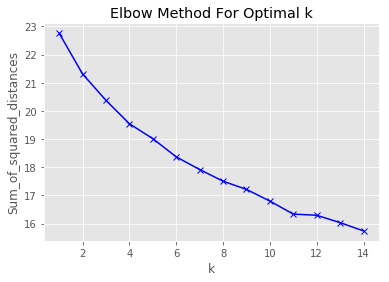

In [20]:
#finding the optimal value of k

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(Tube_venues_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [21]:
#The 'knee' in the above graphs is at 11.
#clustering the stations using the optimum value of k = 11
#clustering the tube stations based on the venues around them.  Ensuring the approach works using a k = 6.

kclusters = 11

Tube_venues_grouped_clustering = Tube_venues_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tube_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([ 3,  3,  4,  4,  7,  4,  4,  4,  2,  3,  4,  3,  4,  4,  2,  5,  3,
        3,  0,  1,  1,  4,  3,  2,  4,  3,  0,  1, 10, 10,  3,  1,  1,  2,
        1,  2,  1,  2,  3,  3,  4,  4,  4,  1,  7,  4,  3,  4,  9,  1,  8,
        3,  3,  4,  3,  3,  2,  1,  2,  3,  4,  1,  6,  0,  1,  4,  3,  3,
        4,  9, 10,  1,  7,  4,  1,  4,  3,  3,  3,  2,  9, 10,  3,  4,  3,
        9,  3,  1,  9,  3,  4,  2,  9,  4,  3,  4,  1, 10,  3,  9], dtype=int32)

In [25]:
#creating a dataframe with cluster labels and stations together

del neighbourhoods_venues_sorted['Cluster labels']

neighbourhoods_venues_sorted.insert(0,'Cluster labels', kmeans.labels_)

list(neighbourhoods_venues_sorted)

Tube_venues_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Tube_venues_merged = Tube_venues_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Name')

Tube_venues_merged.head(10) # check the last columns!

,Name,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton Town,51.50250,-0.27812,3,Platform,Grocery Store,Deli / Bodega,Breakfast Spot,Fish & Chips Shop,Basketball Court,Coffee Shop,Kebab Restaurant,Museum,Pizza Place
1,Acton Central,51.50883,-0.26303,3,Gym / Fitness Center,Pub,Creperie,Bakery,Grocery Store,Park,Train Station,Mini Golf,Coffee Shop,Wine Shop
3,Aldgate,51.51394,-0.07537,4,Coffee Shop,Hotel,Gym / Fitness Center,Restaurant,Pub,Italian Restaurant,Cocktail Bar,BBQ Joint,Bakery,Street Food Gathering
4,Aldgate East,51.51514,-0.07178,4,Coffee Shop,Hotel,Pub,Art Gallery,Cocktail Bar,Asian Restaurant,Salad Place,Restaurant,Greek Restaurant,Movie Theater
5,Alperton,51.54097,-0.30061,7,Indian Restaurant,Gym / Fitness Center,Café,Sandwich Place,Food & Drink Shop,Asian Restaurant,Supermarket,Event Space,Exhibit,Falafel Restaurant
6,Amersham,51.67435,-0.60732,4,Coffee Shop,Sandwich Place,Grocery Store,Climbing Gym,Pizza Place,Supermarket,Gym / Fitness Center,Pharmacy,Pool,Bar
7,Angel,51.53253,-0.10579,4,Coffee Shop,Burrito Place,Sushi Restaurant,Pub,Food Truck,Nightclub,Chinese Restaurant,Street Food Gathering,Indian Restaurant,Beer Bar
8,Archway,51.56536,-0.13474,4,Coffee Shop,Grocery Store,Pub,Pizza Place,Italian Restaurant,Bar,Café,Fast Food Restaurant,Farmers Market,Gastropub
9,Arnos Grove,51.61625,-0.13355,2,Pool,Park,Chinese Restaurant,Metro Station,Grocery Store,Field,Event Space,Exhibit,Falafel Restaurant,Farm
10,Arsenal,51.55847,-0.10561,3,Soccer Stadium,Pub,Gym / Fitness Center,Park,Sports Bar,Metro Station,Clothing Store,Stadium,Bakery,Fish & Chips Shop


In [26]:
#Converting latitudes and longitudes to floats so they can be plotted on a map

Tube_venues_merged.dtypes

Tube_venues_merged ["Latitude"] = Tube_venues_merged["Latitude"].astype(float)
Tube_venues_merged ['Longitude'] = Tube_venues_merged['Longitude'].astype(float)

Tube_venues_merged.dtypes


Name                       object
Latitude                  float64
Longitude                 float64
Cluster labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [27]:
latitude = 51.5074
longitude = 0.1278

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tube_venues_merged['Latitude'], Tube_venues_merged['Longitude'], Tube_venues_merged['Name'], Tube_venues_merged['Cluster labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1]).add_to(map_clusters)



map_clusters

In [28]:
Tube_venues_merged.loc[Tube_venues_merged['Cluster labels'] == 3, Tube_venues_merged.columns[[0] + list(range(4, Tube_venues_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton Town,Platform,Grocery Store,Deli / Bodega,Breakfast Spot,Fish & Chips Shop,Basketball Court,Coffee Shop,Kebab Restaurant,Museum,Pizza Place
1,Acton Central,Gym / Fitness Center,Pub,Creperie,Bakery,Grocery Store,Park,Train Station,Mini Golf,Coffee Shop,Wine Shop
10,Arsenal,Soccer Stadium,Pub,Gym / Fitness Center,Park,Sports Bar,Metro Station,Clothing Store,Stadium,Bakery,Fish & Chips Shop
13,Balham,Coffee Shop,Pub,Pizza Place,Italian Restaurant,Steakhouse,English Restaurant,Beer Store,Supermarket,Café,Shop & Service
18,Barons Court,Pub,Hotel,Café,Cocktail Bar,Convenience Store,Coffee Shop,Garden,Sandwich Place,Tennis Stadium,Gym
19,Bayswater,Chinese Restaurant,Hotel,Greek Restaurant,Persian Restaurant,Gym / Fitness Center,Coffee Shop,Turkish Restaurant,Brazilian Restaurant,Noodle House,French Restaurant
24,Blackfriars,Hotel,Pub,Falafel Restaurant,Restaurant,Coffee Shop,Modern European Restaurant,Juice Bar,South American Restaurant,Burger Joint,Noodle House
27,Borough,Pub,Breakfast Spot,Café,Street Food Gathering,Gym / Fitness Center,Coffee Shop,Brewery,Asian Restaurant,Music Venue,Garden
32,Brixton,Market,Beer Bar,Pizza Place,Caribbean Restaurant,Food Court,Pub,Beer Store,Okonomiyaki Restaurant,Mediterranean Restaurant,Tapas Restaurant
40,Camden Road,Pub,Market,Italian Restaurant,Vegetarian / Vegan Restaurant,Café,Ice Cream Shop,Sandwich Place,Caribbean Restaurant,Beer Bar,Rock Club


In [30]:
#creating a dataframe which shows which shows the most common venues for a cluster type

#del Tube_venues_grouped['Cluster labels']

Tube_venues_grouped.insert(0,'Cluster labels', kmeans.labels_)

df4 = Tube_venues_grouped.drop(['Neighbourhood'], axis=1)

df5 = df4.groupby(['Cluster labels']).sum()
df5



,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio
Cluster labels,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
1,0.000000,0.000000,0.037037,0.000000,0.000000,0.066667,0.106667,0.000000,0.033333,0.000000,...,0.034483,0.0625,0.000000,0.166667,0.066667,0.271795,0.073333,0.033333,0.033333,0.562037
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,...,0.267816,0.0000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.066667,0.000000,0.000000,0.273333,0.000000,0.033333,0.033333,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.533333,0.190909,0.066667,0.066667,0.000000,0.333333
4,0.033333,0.034483,0.033333,0.533333,0.033333,0.100000,0.033333,0.000000,0.000000,0.033333,...,0.067816,0.0000,0.033333,0.000000,0.578095,0.108333,0.000000,0.166667,0.000000,0.235632
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.055556,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
# creating a data frame with a count for how many of each venue type is in each cluster type
Tube_venues_count = pd.get_dummies(Tube_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tube_venues_count['Neighbourhood'] = Tube_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tube_venues_count.columns[-1]] + list(Tube_venues_count.columns[:-1])
Tube_venues_count = Tube_venues_count[fixed_columns]

Tube_venues_totals = Tube_venues_count.groupby('Neighbourhood').sum()
Tube_venues_totals.head(10)

#Adding in the cluster labels to the dataframe

Tube_venues_totals.insert(0,'Cluster labels', kmeans.labels_)

df6 = Tube_venues_totals.reset_index(drop=True)
df6.head()

Number_venues_in_cluster = df6.groupby(['Cluster labels']).sum()
Number_venues_in_cluster

#normalizing the data for each cluster (row)

df7 = Number_venues_in_cluster.div(Number_venues_in_cluster.sum(axis=1), axis=0)
df7

,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio
Cluster labels,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
1,0.000000,0.000000,0.000791,0.00000,0.000000,0.001581,0.002372,0.000000,0.000791,0.000000,...,0.000791,0.000791,0.000000,0.000791,0.001581,0.004743,0.001581,0.000791,0.000791,0.007905
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.002273,0.000000,0.000000,0.000000,0.000000,...,0.006818,0.000000,0.000000,0.000000,0.000000,0.002273,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.001089,0.00000,0.000000,0.004355,0.000000,0.000544,0.000544,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.008710,0.001633,0.001089,0.001089,0.000000,0.005444
4,0.000574,0.000574,0.000574,0.00918,0.000574,0.001721,0.000574,0.000000,0.000000,0.000574,...,0.001147,0.000000,0.000574,0.000000,0.009180,0.001721,0.000000,0.002869,0.000000,0.004016
5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
#creating a dataframe suitable for a pie chart

df8 = df7.transpose()


df8.head(20)

Cluster labels,0,1,2,3,4,5,6,7,8,9,10
Accessories Store,0.0,0.000000,0.000000,0.000000,0.000574,0.0,0.000000,0.000000,0.0,0.001300,0.000000
Afghan Restaurant,0.0,0.000000,0.000000,0.000000,0.000574,0.0,0.000000,0.000000,0.0,0.000000,0.000000
African Restaurant,0.0,0.000791,0.000000,0.001089,0.000574,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Airport Lounge,0.0,0.000000,0.000000,0.000000,0.009180,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Airport Service,0.0,0.000000,0.000000,0.000000,0.000574,0.0,0.000000,0.000000,0.0,0.000000,0.000000
American Restaurant,0.0,0.001581,0.002273,0.004355,0.001721,0.0,0.033333,0.000000,0.0,0.002601,0.000000
Antique Shop,0.0,0.002372,0.000000,0.000000,0.000574,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Aquarium,0.0,0.000000,0.000000,0.000544,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Arcade,0.0,0.000791,0.000000,0.000544,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Arepa Restaurant,0.0,0.000000,0.000000,0.000000,0.000574,0.0,0.000000,0.000000,0.0,0.000000,0.000000


Text(0.5,0,'Venue type')

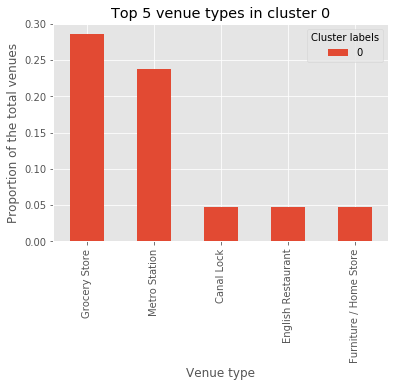

In [33]:
#Getting the the five most frequent venues for the 0 cluster
df9 = df8.nlargest(5, [0]) 
df10=df9[[0]]

df10.plot(kind='bar')


plt.title('Top 5 venue types in cluster 0')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

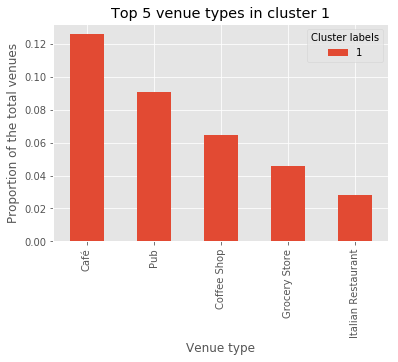

In [34]:
#Getting the the five most frequent venues for the 1 cluster
df9 = df8.nlargest(5, [1]) 
df11 = df9[[1]]

df11.plot(kind='bar')

plt.title('Top 5 venue types in cluster 1')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

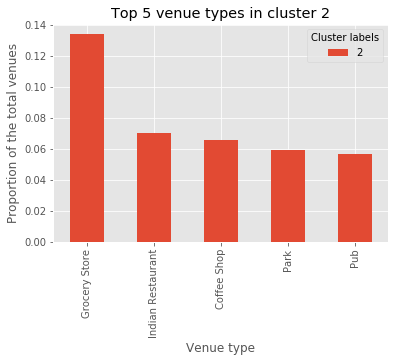

In [35]:
#Getting the the five most frequent venues for the 2 cluster
df9 = df8.nlargest(5, [2]) 
df12 = df9[[2]]

df12.plot(kind='bar')

plt.title('Top 5 venue types in cluster 2')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

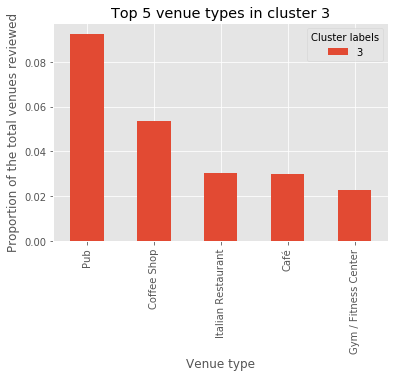

In [36]:
#Getting the the five most frequent venues for the 3 cluster
df9 = df8.nlargest(5, [3]) 
df13 = df9[[3]]

df13.plot(kind='bar')

plt.title('Top 5 venue types in cluster 3')
plt.ylabel('Proportion of the total venues reviewed')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

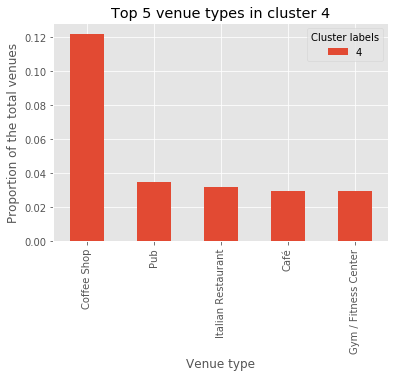

In [37]:
#Getting the the five most frequent venues for the 4 cluster
df9 = df8.nlargest(5, [4]) 
df14 = df9[[4]]

df14.plot(kind='bar')

plt.title('Top 5 venue types in cluster 4')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

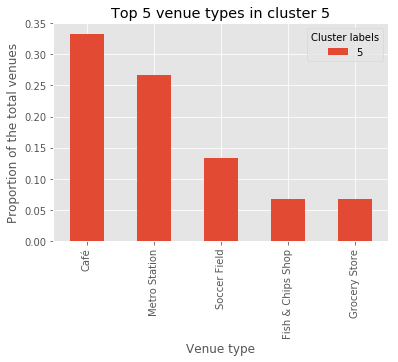

In [48]:
#Getting the the five most frequent venues for the 5 cluster
df9 = df8.nlargest(5, [5]) 
df14 = df9[[5]]

df14.plot(kind='bar')

plt.title('Top 5 venue types in cluster 5')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

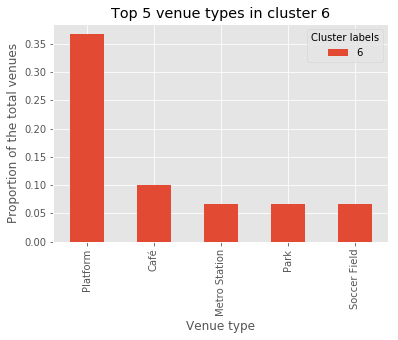

In [47]:
#Getting the the five most frequent venues for the 6 cluster
df9 = df8.nlargest(5, [6]) 
df14 = df9[[6]]

df14.plot(kind='bar')

plt.title('Top 5 venue types in cluster 6')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

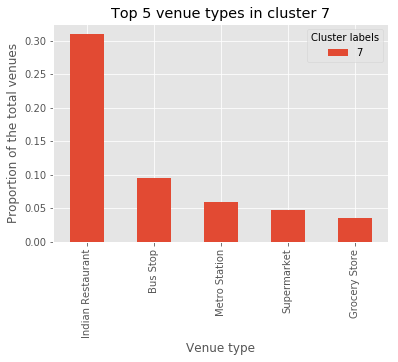

In [46]:
#Getting the the five most frequent venues for the 7 cluster
df9 = df8.nlargest(5, [7]) 
df14 = df9[[7]]

df14.plot(kind='bar')

plt.title('Top 5 venue types in cluster 7')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

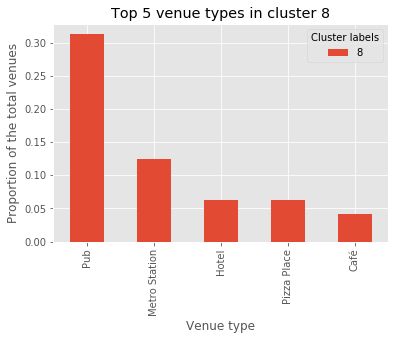

In [49]:
#Getting the the five most frequent venues for the 8 cluster
df9 = df8.nlargest(5, [8]) 
df14 = df9[[8]]

df14.plot(kind='bar')

plt.title('Top 5 venue types in cluster 8')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

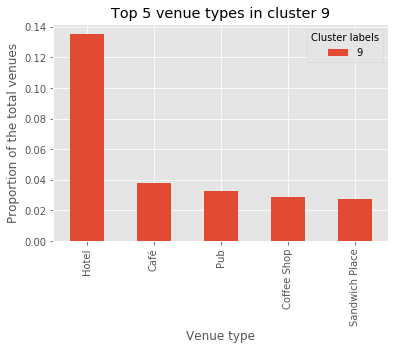

In [51]:
#Getting the the five most frequent venues for the 9 cluster
df9 = df8.nlargest(5, [9]) 
df14 = df9[[9]]

df14.plot(kind='bar')

plt.title('Top 5 venue types in cluster 9')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

Text(0.5,0,'Venue type')

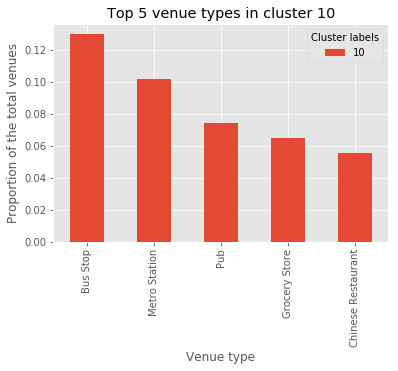

In [52]:
#Getting the the five most frequent venues for the 10 cluster
df9 = df8.nlargest(5, [10]) 
df14 = df9[[10]]

df14.plot(kind='bar')

plt.title('Top 5 venue types in cluster 10')
plt.ylabel('Proportion of the total venues')
plt.xlabel('Venue type')

In [53]:
#calculating how many tube stations are in each cluster

#Tube_venues_merged.groupby['Cluster label'].count()

df15=Tube_venues_merged.groupby(['Cluster labels']).count()
df16 = df15[['Name']]
df16

#df.columns = ['a', 'b']
df16.columns = ['Count']
df16


,Count
Cluster labels,
0,5
1,55
2,32
3,69
4,65
5,4
6,4
7,8
8,8
